# Exploratory Data Analysis
Who wants to share their idea on what Exploratory Data Analysis means? :)

One of the most important steps in extracting value from data is performing Exploratory Data Analysis.  
In fact, much of the time spent (roughly 50%) in data analytics focuses on Exploratory Data Analysis.

What do we do in Exploratory Data Analysis?
1. **Examine Descriptive statistics** such as mean, median, mode, range, standard deviation.
2. **Look at correlations.**
3. **Loot at data distributions.**
4. **Create Visualizations** to find trends in the data.

Other ideas?

### Why Pandas?

Pandas is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python.

Some of its inspiration is taken from the programming language R which is another language that is widely used for data analysis. Now, while R excels in data analysis, it has a steeper learning curve which make it difficult for beginners to learn. Now some developers wanted to solve this issue and their solution was to develop a data analysis library in a language that is much easier to learn. Hence, Pandas.

To load the pandas library into our notebooks, we do:

```python
import pandas as pd
```

Notice that we add the words `as pd`. When we do this, we are **aliasing**. That is, instead of typing `pandas`, we just need to type `pd` which is easier.

## Quick Pandas Demonstration (Wine Quality)

![Bordeaux](images/bordeaux.png)

Let's take a quick exploratory data analysis to showcase what pandas can do. In this demonstration, we will use a popular dataset for wine.

Bordeaux is a famous place in France known for its high quality wine which is sold worldwide. Now, wine quality which then translate to wine price is traditionally measured by expert wine tasters or connoisseurs. Wine, as we know it, tastes better as it gets older. That is why, the common practice is to store young wines until they mature. The problem is that it is hard to determine the future price of young wine since tastes could potentially change greatly as time goes on. What we will show here is some techniques that we can use prior to creating prediction models later on.

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline

In [11]:
# Read Data from File
df_wine = pd.read_csv('data/winePricePrediction.csv')

In [12]:
# take a lot at the first five entries of our data
df_wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


From Above, we see that there are several variables:

Independent Variables
- **Year**: The year when the wine was produced
- **WinterRain**: Amount of waterfall during winter that year
- **HarvestRain**: Amount of rainfall during harvest
- **Age**: Age of wine
- **AGST**: Average Growing Season Temperature
- **FrancePop**: Population of France during the given year (In thousands)

Dependent Variable
- **Price**: The price of wine

In [33]:
# Check data type of each entry
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 7 columns):
Year           8 non-null float64
Price          8 non-null float64
WinterRain     8 non-null float64
AGST           8 non-null float64
HarvestRain    8 non-null float64
Age            8 non-null float64
FrancePop      8 non-null float64
dtypes: float64(7)
memory usage: 512.0+ bytes


In [34]:
# Descriptive Statistics for Each Data
df_summary = df_wine.describe()
df_summary

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


There are a lot of data above but we can access particular summaries too!

In [35]:
# get summary of particular columns
df_summary[['Age', 'Price']]

,Age,Price
count,25.000000,25.000000
mean,17.200000,7.067224
std,7.691987,0.650341
min,5.000000,6.204900
25%,11.000000,6.518800
50%,17.000000,7.121100
75%,23.000000,7.495000
max,31.000000,8.493700


There are more descriptive statistics that we can compute from the data. See this [link](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats) for other statistics that you might want to get.

In [36]:
df_wine.columns

Index(['Year', 'Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop'],
      dtype='object')

/Users/User/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x118b85160>,
 'caps': [<matplotlib.lines.Line2D at 0x118b89be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x118b8fdd8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118b8f5c0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x118b85b70>,
  <matplotlib.lines.Line2D at 0x118bf7a58>]}

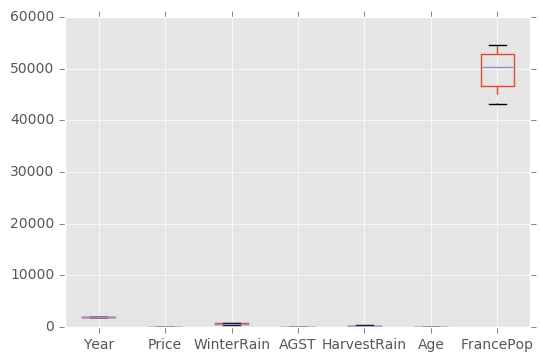

In [38]:
df_wine.boxplot()

Notice that the Visualization looks bad because of The FrancePop variable is way too big compared to the others. Let's modify the representation. Instead of representing the population in thousands, let's use in millions.

In [40]:
df_wine['FrancePop'] = df_wine['FrancePop'] / 1000

In [41]:
df_wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43.183569
1,1953,8.0393,690,16.7333,80,30,43.495030
2,1955,7.6858,502,17.1500,130,28,44.217857
3,1957,6.9845,420,16.1333,110,26,45.152252
4,1958,6.7772,582,16.4167,187,25,45.653805


/Users/User/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x118f86d68>,
 'caps': [<matplotlib.lines.Line2D at 0x118f94828>,
 'fliers': [<matplotlib.lines.Line2D at 0x118f99fd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118f99208>,
 'whiskers': [<matplotlib.lines.Line2D at 0x118f86f28>,
  <matplotlib.lines.Line2D at 0x116651fd0>]}

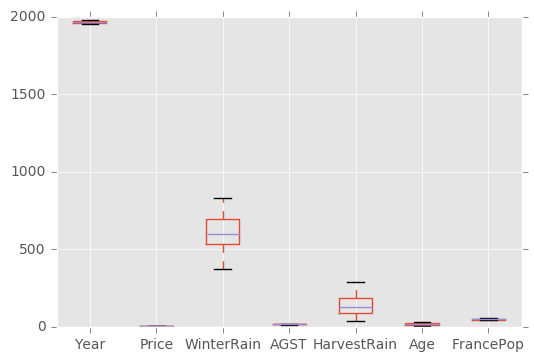

In [42]:
df_wine.boxplot()

Good job! Now, we have fixed FrancePop Variable but now, the year variable is acting strange! Now, let's also perform changes to it. The simplest we can do is shift the years where the starting year would now become 1.

In [44]:
df_wine['Year'] = df_wine['Year'] - df_wine['Year'].min()

In [45]:
df_wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,0,7.4950,600,17.1167,160,31,43.183569
1,1,8.0393,690,16.7333,80,30,43.495030
2,3,7.6858,502,17.1500,130,28,44.217857
3,5,6.9845,420,16.1333,110,26,45.152252
4,6,6.7772,582,16.4167,187,25,45.653805


/Users/User/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x119dc06d8>,
 'caps': [<matplotlib.lines.Line2D at 0x119dc8ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x119dd3a20>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119dcdb38>,
 'whiskers': [<matplotlib.lines.Line2D at 0x119dc0978>,
  <matplotlib.lines.Line2D at 0x119e34eb8>]}

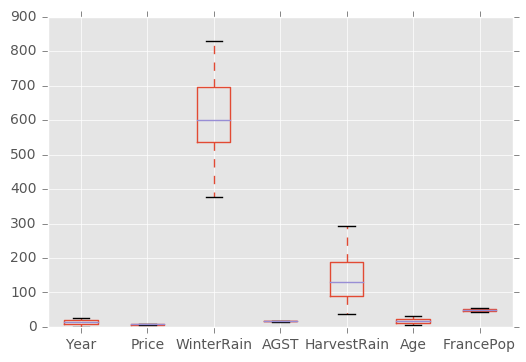

In [46]:
df_wine.boxplot()

Now it sees that only WinterRain and HarvestRain seems to have similar values. Let's use a separate plot for both and nother for the other variables.

/Users/User/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x119f8b0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x119f91b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x119f96d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119f96518>,
 'whiskers': [<matplotlib.lines.Line2D at 0x119f8bac8>,
  <matplotlib.lines.Line2D at 0x119fa3c50>]}

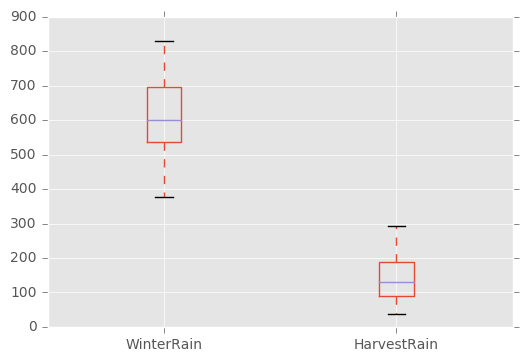

In [47]:
# Select WinterRain and HarvestRain variables only
df_wine[['WinterRain', 'HarvestRain']].boxplot()

/Users/User/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11a1a2748>,
 'caps': [<matplotlib.lines.Line2D at 0x11a1a8b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a1b4a90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a1adba8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11a1a29e8>,
  <matplotlib.lines.Line2D at 0x11a3c2c50>]}

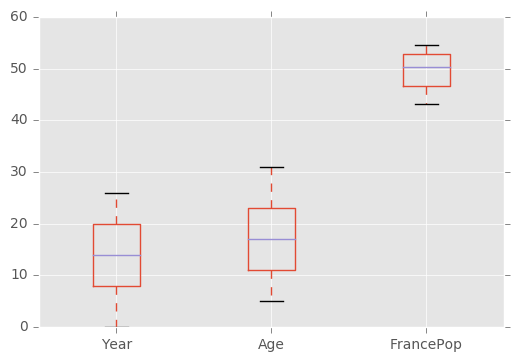

In [49]:
df_wine[['Year', 'Age', 'FrancePop']].boxplot()

/Users/User/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11a42e588>,
 'caps': [<matplotlib.lines.Line2D at 0x11a435f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a4f7860>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a4f2978>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11a42ef28>,
  <matplotlib.lines.Line2D at 0x11a4fefd0>]}

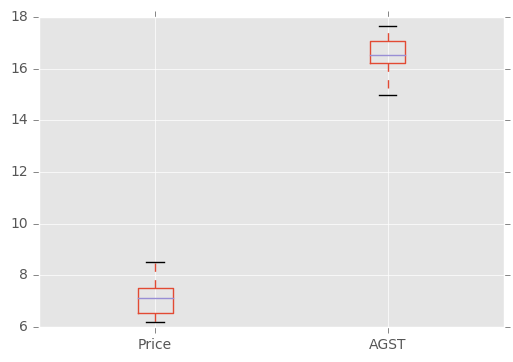

In [50]:
df_wine[['Price', 'AGST']].boxplot()

Awesome! Now let's examine distributions for some variables using a histogram

In [51]:
df_wine.columns

Index(['Year', 'Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age',
       'FrancePop'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3fbbe0>]], dtype=object)

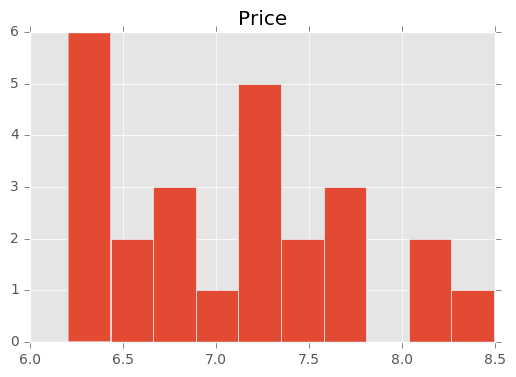

In [52]:
df_wine[['Price']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb905c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c18ce48>]], dtype=object)

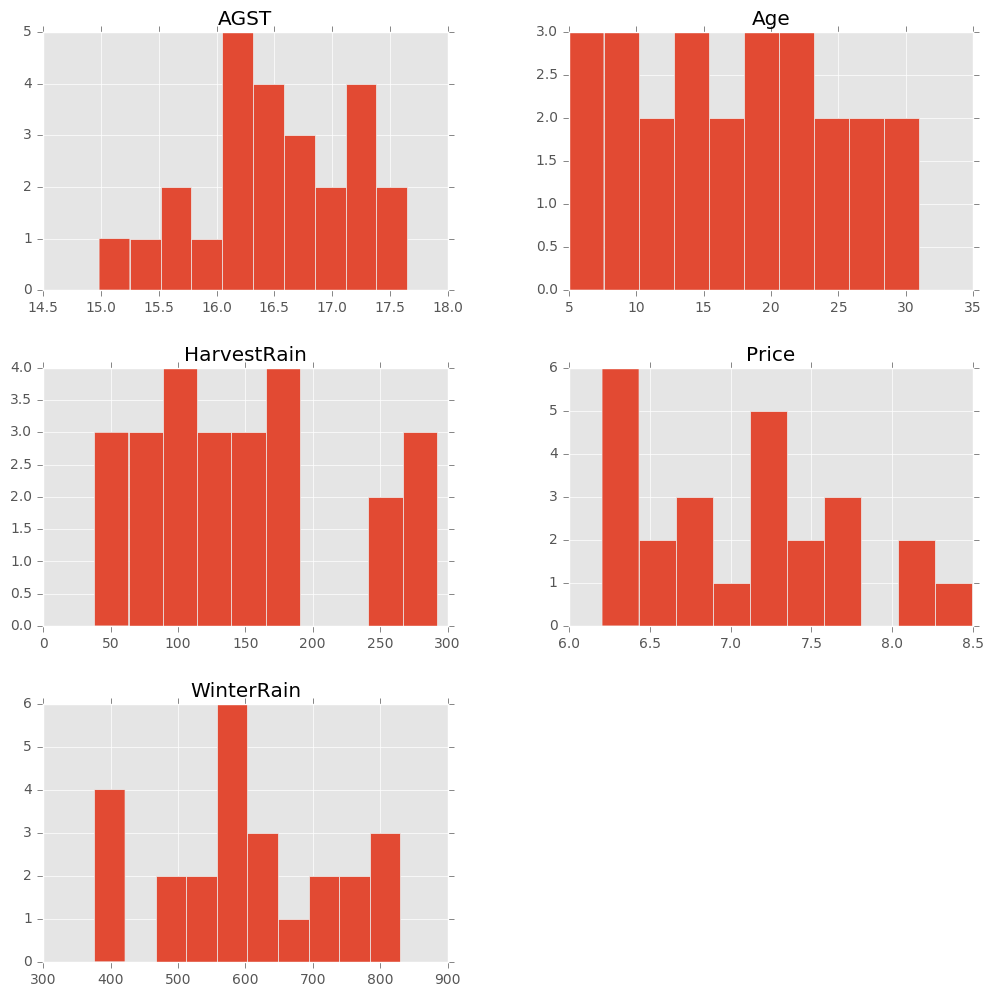

In [58]:
df_wine[['Price', 'WinterRain', 'AGST', 'HarvestRain', 'Age']].hist(figsize=(12,12))

#### Correlations

In [59]:
df_wine.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


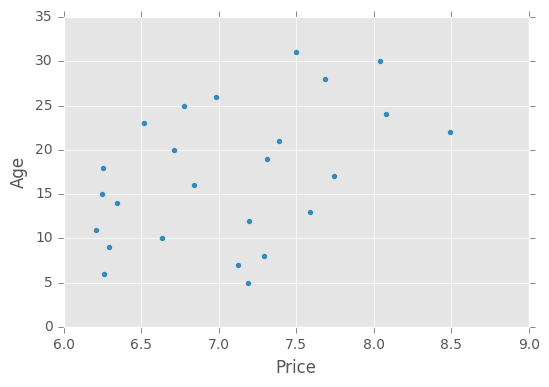

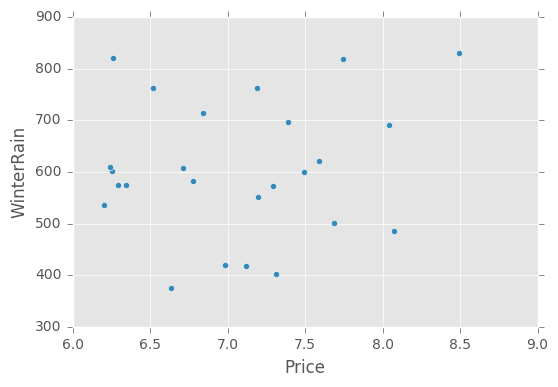

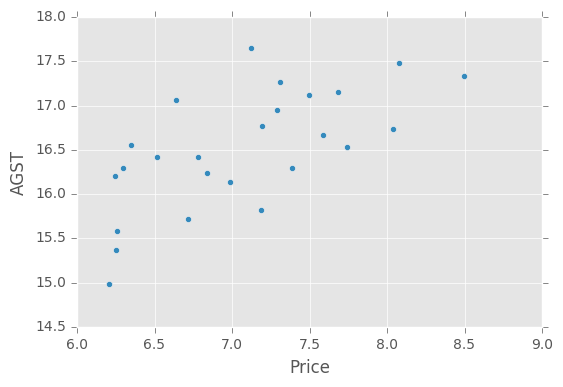

In [67]:
df_wine.plot.scatter(x='Price', y='Age')
df_wine.plot.scatter(x='Price', y='WinterRain')
df_wine.plot.scatter(x='Price', y='AGST')

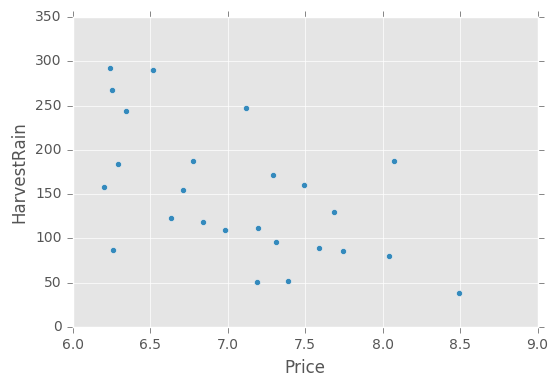

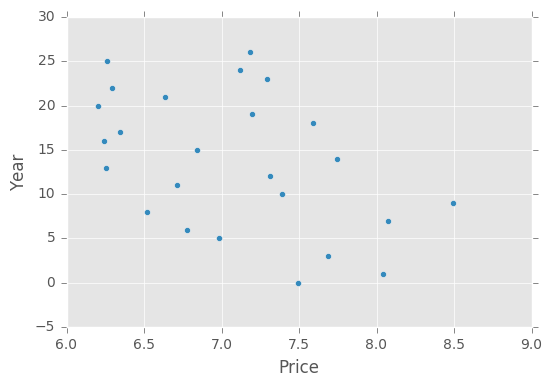

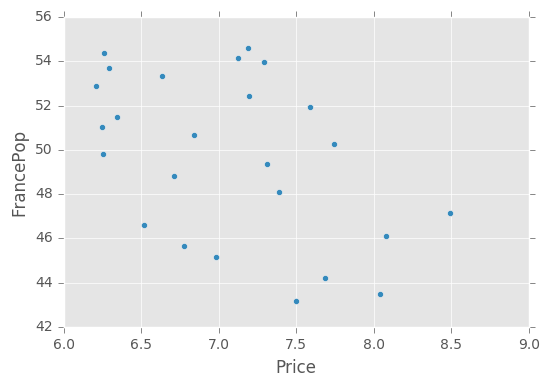

In [72]:
df_wine.plot.scatter(x='Price', y='HarvestRain')
df_wine.plot.scatter(x='Price', y='Year')
df_wine.plot.scatter(x='Price', y='FrancePop')

Now we can create all boxplots and scattersplots in one go too!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121db5198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1235641d0>]], dtype=object)

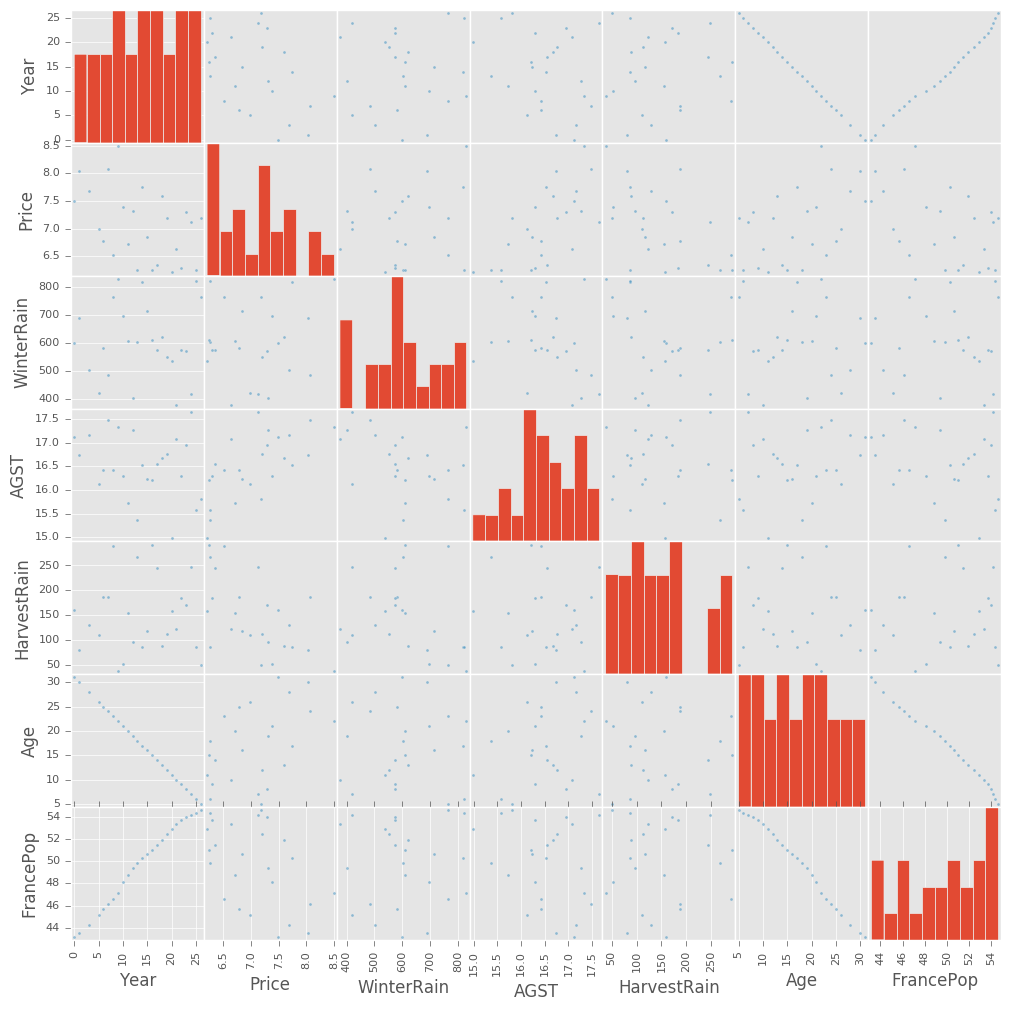

In [71]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df_wine, figsize=(12,12))

Now that you have done a basic exploratory data analysis, what insight did you get regarding the independent variables to the dependent variable?